In [77]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [78]:
# CASE ONE

In [79]:
#u[0] u[1] u[2] u[3] u[4] u[5] u[6] u[7]
#x1   y1    x2   y2  v1x  v1y  v2x  v2y

def myfun(t, u):
    f = np.zeros((8,))
    f[0] = u[4]
    f[1] = u[5]
    f[2] = u[6]
    f[3] = u[7]
    R1 = np.sqrt((u[0]**2 + u[1]**2))
    R2 = np.sqrt(u[2]**2 + u[3]**2)
    dx = u[0] - u[2]
    dy = u[1] - u[3]
    R12 = np.sqrt(dx**2 + dy**2)
    q1 = -G*Ms/(R1**3)
    q2 = -G*Ms/(R2**3)
    q12 = -G*Mp2/(R12**3)
    q21 = -G*Mp1/(R12**3)
    f[4] = q1*u[0] + q12*dx
    f[5] = q1*u[1] + q12*dy
    f[6] = q2*u[2] - q21*dx
    f[7] = q2*u[3] - q21*dy
    return f

In [80]:
# CASE ONE 
# 1) x-y plot of the planet orbits
G = 6.67e-11 # m3 * kg-1 * s-2
Ms = 1.98e30 # mass sun in kg
Re = 150e9 #km distance between sun and earth
Mp1 = 0.001*Ms # mass planet 1
Mp2 = Mp1
Rp1 = Re
Rp2 = 0.95 * Rp1
q1 = 0.05    # Angle for Planet 1 (radians)
q2 = -0.05   # Angle for Planet 2 (radians)
u0[0] = math.cos(q1)*Rp1; u0[1] = math.sin(q1)*Rp1
u0[2] = math.cos(q2)*Rp2; u0[3] = math.sin(q2)*Rp2

# keplers law
k = 4*(np.pi**2)/ ( G*Ms) #constant of proportionality
Pp1 = np.sqrt(k*(Rp1**3))
Pp2 = np.sqrt(k*(Rp2**3)) #period of planet 2
Vp1 = (2*np.pi*Rp1)/Pp1 #orbital velocity planet 1
Vp2 = Vp1

In [81]:
#u[0] u[1] u[2] u[3] u[4] u[5] u[6] u[7]
#x1   y1    x2   y2  v1x  v1y  v2x  v2y

u0 = np.zeros((8,))
u0[0] = Rp1
u0[1] = 0
u0[2] = Rp2
u0[3] = 0
u0[4] = 0
u0[5] = Vp1
u0[6] = 0
u0[7] = -Vp2

In [82]:
Dt = 360
t0 = 0
tmax = 20*Pp1
t = np.arange(t0, tmax,Dt)

In [83]:
from scipy.integrate import solve_ivp
sol = solve_ivp(myfun, [t0,tmax], u0, method='DOP853', t_eval=t)

Text(0, 0.5, 'y (km)')

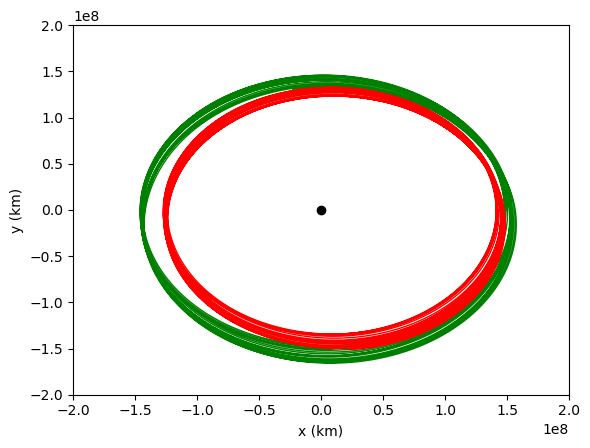

In [84]:
fig1 = plt.figure()
ax = plt.subplot(1,1,1)
plt.axis( [-2e8, 2e8, -2e8, 2e8] )
plt.plot(0,0, 'ko', lw=2)
plt.plot(sol.y[0]/1000, sol.y[1]/1000, 'g-', lw=1) #planet 1
plt.plot(sol.y[2]/1000, sol.y[3]/1000, 'r-', lw=1)
plt.xlabel('x (km)')
plt.ylabel('y (km)')

Text(0.5, 0, 'time (s)')

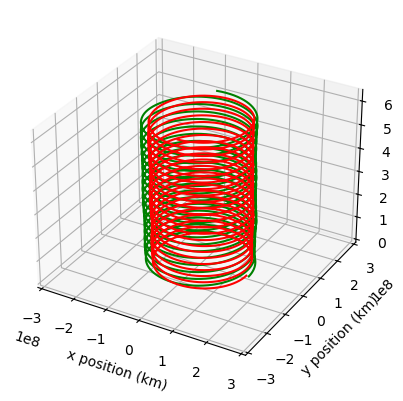

In [85]:
# 2) CASE ONE: 3D plot of planet orbits over time,

fig1 = plt.figure()
ax1 = fig1.add_subplot(projection='3d')
ax1.set_xlim((-3e8, 3e8))
ax1.set_ylim((-3e8, 3e8))
ax1.set_zlim((t0, tmax))
ax1.plot(sol.y[0]/1000, sol.y[1]/1000, sol.t, 'g-') #planet 1
ax1.plot(sol.y[2]/1000, sol.y[3]/1000, sol.t, 'r-') # planet 2
ax1.set_xlabel('x position (km)')
ax1.set_ylabel('y position (km)') 
ax1.set_zlabel('time (s)')

Text(0, 0.5, 'Orbital Radius, R (km)')

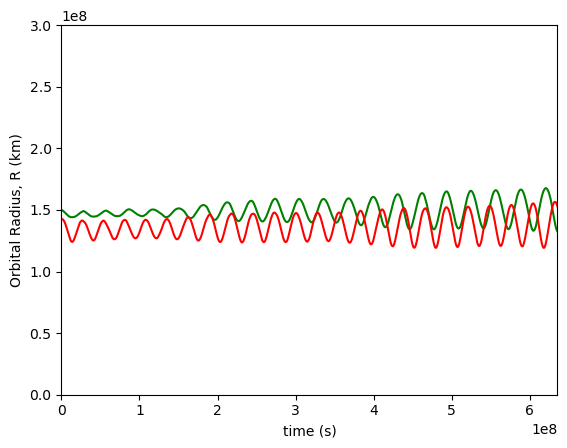

In [86]:
# 3) CASE ONE: distance of planets from sun over time,

Rad1 = np.sqrt(sol.y[0]**2 + sol.y[1]**2)
Rad2 = np.sqrt(sol.y[2]**2 + sol.y[3]**2)

fig1 = plt.figure()
ax = plt.subplot(1,1,1)
plt.axis( [t0,tmax, 0, 3e8])
plt.plot(t,Rad1/1000, 'g-')
plt.plot(t,Rad2/1000, 'r-')
plt.xlabel('time (s)')
plt.ylabel('Orbital Radius, R (km)')

Text(0, 0.5, 'Planetary distance, R12 (km)')

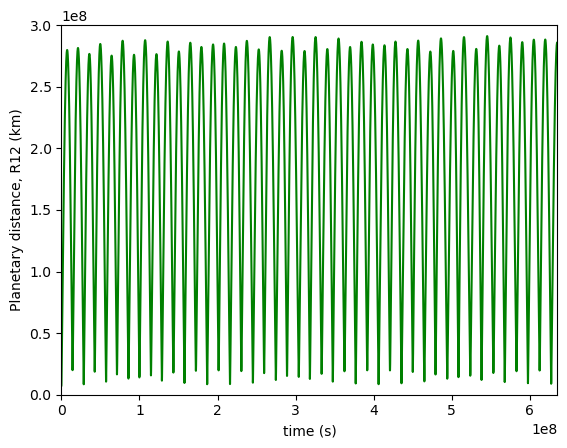

In [87]:
# 4) CASE ONE: distance between the two planets over time,

delx = sol.y[0] - sol.y[2]
dely = sol.y[1] - sol.y[3]

Rad12 = np.sqrt(delx**2 + dely**2)

fig1 = plt.figure()
ax = plt.subplot(1,1,1)
plt.axis( [t0,tmax, 0, 3e8])
plt.plot(t,Rad12/1000, 'g-')
plt.xlabel('time (s)')
plt.ylabel('Planetary distance, R12 (km)')

Text(0, 0.5, 'Planetary Velocity (m/s)')

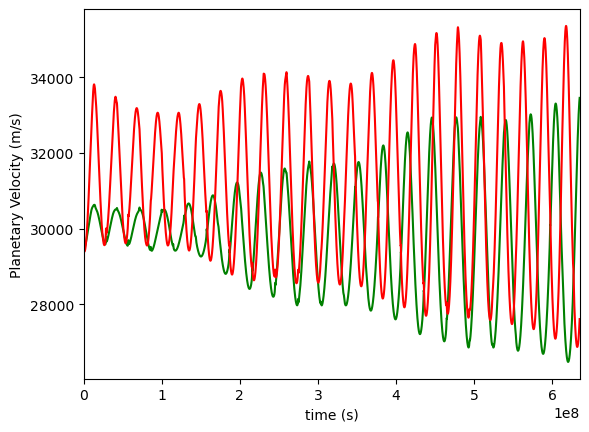

In [88]:
# 5) CASE ONE: speed of the planets over time,
velop1 = np.sqrt(sol.y[4]**2 + sol.y[5]**2)
velop2 = np.sqrt(sol.y[6]**2 + sol.y[7]**2)

fig1 = plt.figure()
ax = plt.subplot(1,1,1)
#plt.axis( [t0,tmax, 0, 3e8])
ax.set_xlim([t0,tmax])
plt.plot(t,velop1, 'g-')
plt.plot(t,velop2, 'r-')

plt.xlabel('time (s)')
plt.ylabel('Planetary Velocity (m/s)')

In [89]:
# 6) CASE ONE: animated x-y plot of the orbits
from matplotlib import animation
N, = np.shape(sol.t)
Nframes = 800
Nskip = int(N/Nframes)
print(N)
print(Nframes)
print(Nskip)


1764611
800
2205


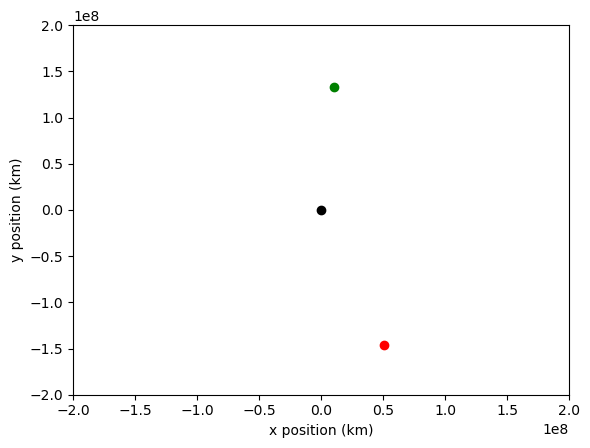

In [90]:
fig = plt.figure()
ax = fig.subplots()
plt.axis( [-2e8, 2e8, -2e8, 2e8] )
plt.plot(0,0, 'ko', lw=2)
ax.set_xlabel('x position (km)')
ax.set_ylabel('y position (km)') 

line1, = ax.plot([],[], 'go', lw=2)
line2, = ax.plot([],[], 'ro', lw=2)

def init():
    line1.set_data([],[])
    line2.set_data([],[])
    return (line1,line2)

def animate(i):
    xp1 = sol.y[0][i*Nskip]/1000
    yp1 = sol.y[1][i*Nskip]/1000
    xp2 = sol.y[2][i*Nskip]/1000
    yp2 = sol.y[3][i*Nskip]/1000
    line1.set_data([xp1],[yp1])
    line2.set_data([xp2],[yp2])
    return (line1,line2)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=Nframes, 
                               interval=100, blit=True)

f = "planetanimation.gif"
writergif = animation.PillowWriter(fps=30)
anim.save(f, writer=writergif)

In [121]:
# CASE TWO 
# 1) x-y plot of the planet orbits

G = 6.67e-11 # m3 * kg-1 * s-2
Ms = 1.98e30 # mass sun in kg
Re = 150e9 #km distance between sun and earth
Mp1 = 0.001*Ms # mass planet 1
Mp2 = 0.01*Mp1
Rp1 = 150e9 #km
Rp2 = 1.001*Rp1

u0 = np.zeros((8,))
u0[0] = Rp1 
u0[1] = 0   
u0[2] = Rp2  
u0[3] = 0   
u0[4] = 0       
u0[5] = -Vp1     # y-velocity P1 (counter-clockwise motion)
u0[6] = 0       
u0[7] = -Vp2     # y-velocity P2 (counter-clockwise motion)

Dt = 3600       
t0 = 0         
tmax = 10 * Pp1 
t = np.arange(t0, tmax, Dt)


# Kepler's 3rd Law constants
k = 4 * (np.pi**2) / (G * Ms)  
Pp1 = np.sqrt(k * (Rp1**3))  
Vp1 = (2 * np.pi * Rp1) / Pp1  
Vp2 = 2.11 * Vp1               

sol = solve_ivp(myfun, [t0, tmax], u0, method='DOP853', t_eval=t)

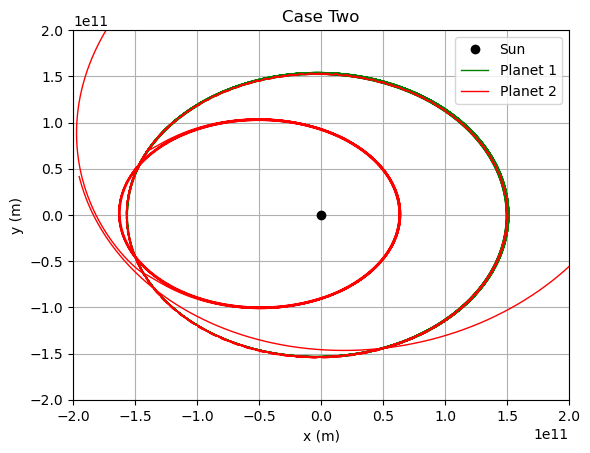

In [122]:
fig1 = plt.figure()
ax = plt.subplot(1, 1, 1)
plt.axis([-2e11, 2e11, -2e11, 2e11])  # Scaling for the orbits
plt.plot(0, 0, 'ko', label="Sun", lw=2)  # Sun at the origin
plt.plot(sol.y[0], sol.y[1], 'g-', label="Planet 1", lw=1)  # Planet 1 orbit
plt.plot(sol.y[2], sol.y[3], 'r-', label="Planet 2", lw=1)  # Planet 2 orbit
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title("Case Two")
plt.legend()
plt.grid()
plt.show()

Text(0.5, 0, 'time (s)')

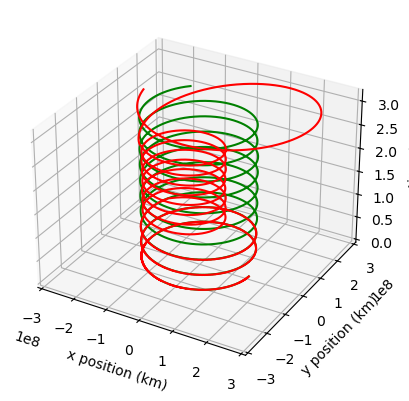

In [123]:
# 2) CASE TWO: 3D plot of planet orbits over time,
fig1 = plt.figure()
ax1 = fig1.add_subplot(projection='3d')
ax1.set_xlim((-3e8, 3e8))
ax1.set_ylim((-3e8, 3e8))
ax1.set_zlim((t0, tmax))
ax1.plot(sol.y[0]/1000, sol.y[1]/1000, sol.t, 'g-') #planet 1
ax1.plot(sol.y[2]/1000, sol.y[3]/1000, sol.t, 'r-') # planet 2
ax1.set_xlabel('x position (km)')
ax1.set_ylabel('y position (km)') 
ax1.set_zlabel('time (s)')

Text(0, 0.5, 'Orbital Radius, R (km)')

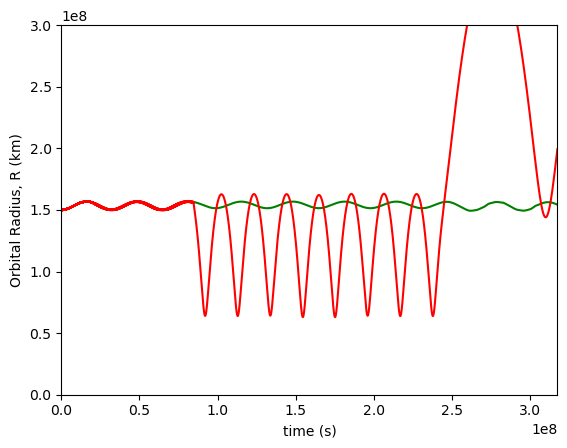

In [124]:
# 3) CASE TWO: distance of planets from sun over time,

Rad1 = np.sqrt(sol.y[0]**2 + sol.y[1]**2)
Rad2 = np.sqrt(sol.y[2]**2 + sol.y[3]**2)

fig1 = plt.figure()
ax = plt.subplot(1,1,1)
plt.axis( [t0,tmax, 0, 3e8])
plt.plot(t,Rad1/1000, 'g-')
plt.plot(t,Rad2/1000, 'r-')
plt.xlabel('time (s)')
plt.ylabel('Orbital Radius, R (km)')

Text(0, 0.5, 'Planetary distance, R12 (km)')

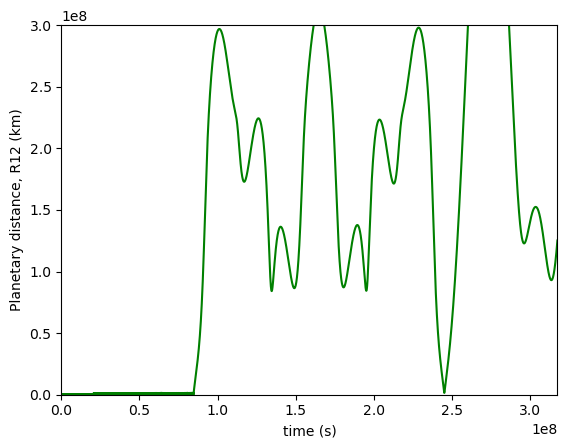

In [125]:
# 4) CASE TWO: distance between the two planets over time,

delx = sol.y[0] - sol.y[2]
dely = sol.y[1] - sol.y[3]

Rad12 = np.sqrt(delx**2 + dely**2)

fig1 = plt.figure()
ax = plt.subplot(1,1,1)
plt.axis( [t0,tmax, 0, 3e8])
plt.plot(t,Rad12/1000, 'g-')
plt.xlabel('time (s)')
plt.ylabel('Planetary distance, R12 (km)')

Text(0, 0.5, 'Planetary Velocity (m/s)')

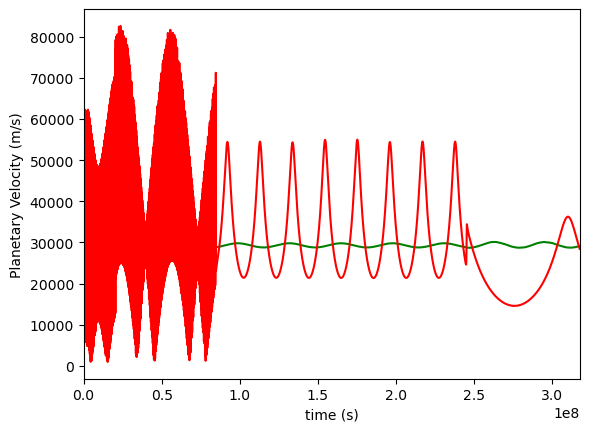

In [126]:
# 5) CASE TWO: speed of the planets over time,
velop1 = np.sqrt(sol.y[4]**2 + sol.y[5]**2)
velop2 = np.sqrt(sol.y[6]**2 + sol.y[7]**2)

fig1 = plt.figure()
ax = plt.subplot(1,1,1)
#plt.axis( [t0,tmax, 0, 3e8])
ax.set_xlim([t0,tmax])
plt.plot(t,velop1, 'g-')
plt.plot(t,velop2, 'r-')

plt.xlabel('time (s)')
plt.ylabel('Planetary Velocity (m/s)')

In [127]:
# 6) CASE TWO: animated x-y plot of the orbits
from matplotlib import animation
N, = np.shape(sol.t)
Nframes = 800
Nskip = int(N/Nframes)
print(N)
print(Nframes)
print(Nskip)

88231
800
110


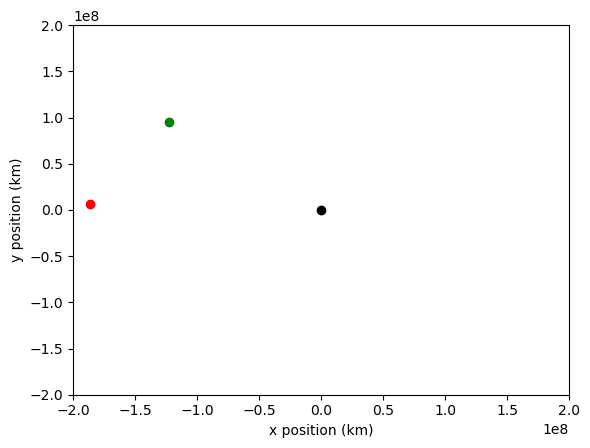

In [128]:
fig = plt.figure()
ax = fig.subplots()
plt.axis( [-2e8, 2e8, -2e8, 2e8] )
plt.plot(0,0, 'ko', lw=2)
ax.set_xlabel('x position (km)')
ax.set_ylabel('y position (km)') 

line1, = ax.plot([],[], 'go', lw=2)
line2, = ax.plot([],[], 'ro', lw=2)

def init():
    line1.set_data([],[])
    line2.set_data([],[])
    return (line1,line2)

def animate(i):
    xp1 = sol.y[0][i*Nskip]/1000
    yp1 = sol.y[1][i*Nskip]/1000
    xp2 = sol.y[2][i*Nskip]/1000
    yp2 = sol.y[3][i*Nskip]/1000
    line1.set_data([xp1],[yp1])
    line2.set_data([xp2],[yp2])
    return (line1,line2)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=Nframes, 
                               interval=100, blit=True)

f = "planetanimation.gif"
writergif = animation.PillowWriter(fps=30)
anim.save(f, writer=writergif)

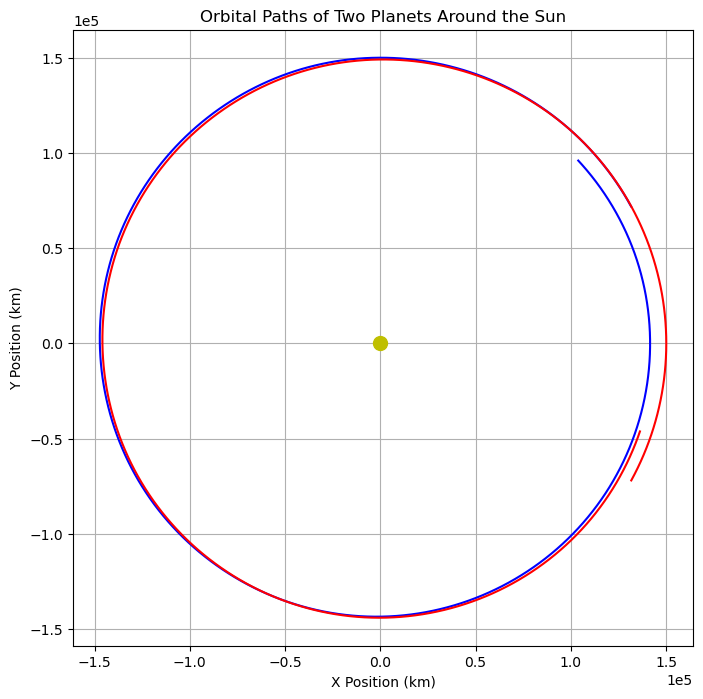

In [97]:
# CASE THREE
#1) x-y plot of the planet orbits,

G = 6.67e-11
Ms = 1.98e30
Re = 150e9
Mp1 = 0.001 * Ms
Mp2 = 0.01 * Mp1
Rp1 = 150e9
Rp2 = 1.001 * Rp1
q1 = 0.5
q2 = -0.5

k = 4 * (np.pi**2) / (G * Ms)
Pp1 = np.sqrt(k * (Rp1**3))
Pp2 = np.sqrt(k * (Rp2**3))

Vp1 = (2 * np.pi * Rp1) / Pp1
Vp2 = (2 * np.pi * Rp2) / Pp2

u0 = np.zeros((8,))
u0[0] = np.cos(q1) * Rp1
u0[1] = np.sin(q1) * Rp1
u0[2] = np.cos(q2) * Rp2
u0[3] = np.sin(q2) * Rp2
u0[4] = -Vp1 * np.sin(q1)
u0[5] = Vp1 * np.cos(q1)
u0[6] = -Vp2 * np.sin(q2)
u0[7] = Vp2 * np.cos(q2)

tmax = 3.154e7
t_eval = np.linspace(t0, tmax, 1000)

sol = solve_ivp(myfun, (t0, tmax), u0, t_eval=t_eval, method='RK45')

x1, y1 = sol.y[0], sol.y[1]
x2, y2 = sol.y[2], sol.y[3]

plt.figure(figsize=(8, 8))
plt.plot(0, 0, 'yo', markersize=10)  # Sun
plt.plot(x1 / 1e6, y1 / 1e6, 'b-')  # Planet 1 (in km)
plt.plot(x2 / 1e6, y2 / 1e6, 'r-')  # Planet 2 (in km)
plt.xlabel("X Position (km)")
plt.ylabel("Y Position (km)")
plt.title("Orbital Paths of Two Planets Around the Sun")
plt.axis('equal')
plt.grid(True)

# Set scientific notation for the axis
plt.ticklabel_format(style='scientific', axis='both', scilimits=(0, 0))

plt.show()

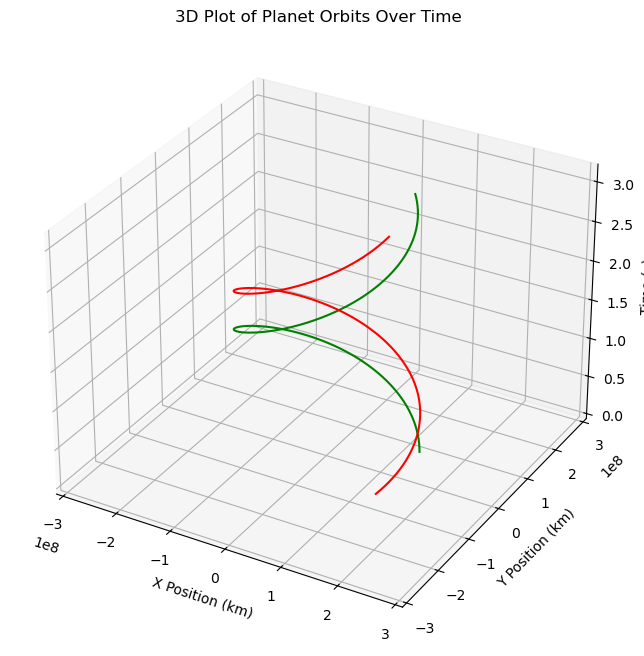

In [103]:
# 2) CASE THREE: 3D plot of planet orbit over time,

fig1 = plt.figure(figsize=(10, 8))
ax1 = fig1.add_subplot(projection='3d')

ax1.set_xlim(-3e8, 3e8)
ax1.set_ylim(-3e8, 3e8)
ax1.set_zlim(t0, tmax)

ax1.plot(sol.y[0] / 1e3, sol.y[1] / 1e3, sol.t, 'g-', ) 
ax1.plot(sol.y[2] / 1e3, sol.y[3] / 1e3, sol.t, 'r-',)

ax1.set_xlabel('X Position (km)')
ax1.set_ylabel('Y Position (km)')
ax1.set_zlabel('Time (s)')

ax1.set_title('3D Plot of Planet Orbits Over Time')
plt.show()

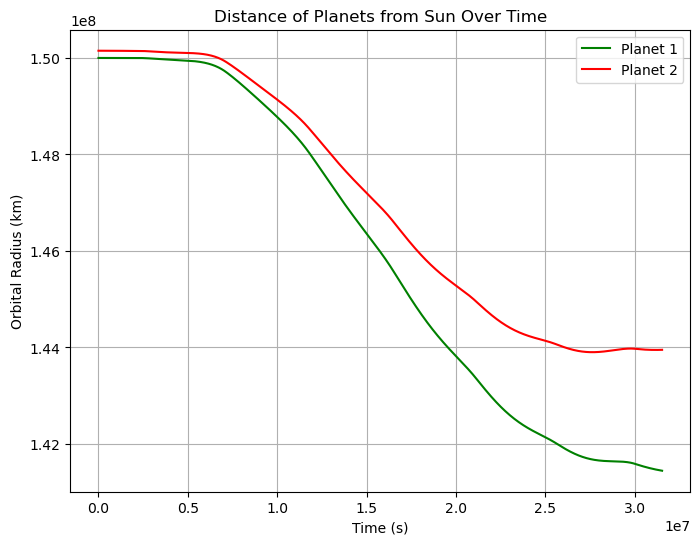

In [99]:
# 3) CASE THREE: distance of planets from sun over time,

Rad1 = np.sqrt(sol.y[0]**2 + sol.y[1]**2)
Rad2 = np.sqrt(sol.y[2]**2 + sol.y[3]**2)

plt.figure(figsize=(8, 6))
plt.plot(sol.t, Rad1 / 1e3, 'g-', label="Planet 1")
plt.plot(sol.t, Rad2 / 1e3, 'r-', label="Planet 2")
plt.xlabel('Time (s)')
plt.ylabel('Orbital Radius (km)')
plt.title('Distance of Planets from Sun Over Time')
plt.legend()
plt.grid()
plt.show()

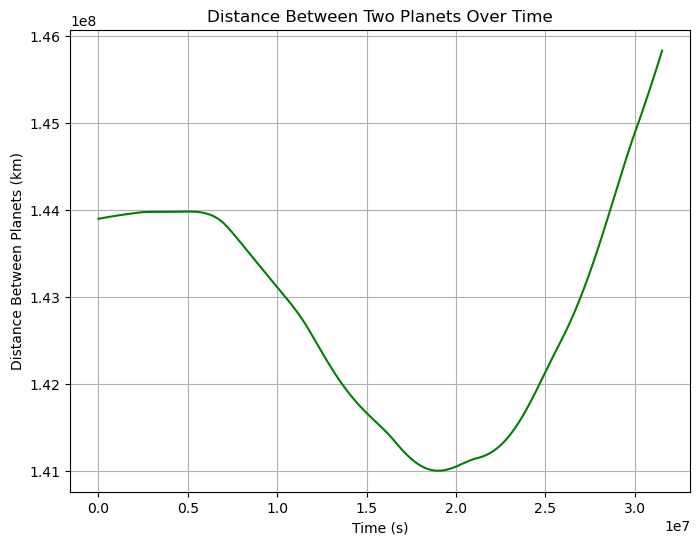

In [104]:
# 4) CASE THREE: distance between the two planets over time,

delx = sol.y[0] - sol.y[2]
dely = sol.y[1] - sol.y[3]

Rad12 = np.sqrt(delx**2 + dely**2)

plt.figure(figsize=(8, 6))
plt.plot(sol.t, Rad12 / 1e3, 'g-')  # Convert to km
plt.xlabel('Time (s)')
plt.ylabel('Distance Between Planets (km)')
plt.title('Distance Between Two Planets Over Time')
plt.grid()
plt.show()

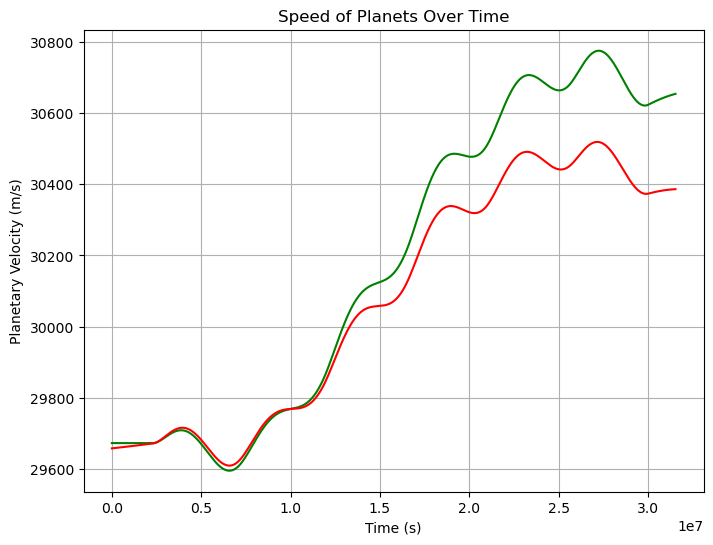

In [105]:
# 5) CASE THREE: speed of the planet over time
velop1 = np.sqrt(sol.y[4]**2 + sol.y[5]**2)  # Speed of Planet 1
velop2 = np.sqrt(sol.y[6]**2 + sol.y[7]**2)  # Speed of Planet 2

plt.figure(figsize=(8, 6))
plt.plot(sol.t, velop1, 'g-',)
plt.plot(sol.t, velop2, 'r-',)
plt.xlabel('Time (s)')
plt.ylabel('Planetary Velocity (m/s)')
plt.title('Speed of Planets Over Time')
plt.grid()
plt.show()

In [108]:
# 6) CASE THREE: animated x-y plot of the orbits
from matplotlib import animation
N, = np.shape(sol.t)
Nframes = 800
Nskip = int(N/Nframes)
print(N)
print(Nframes)
print(Nskip)

1000
800
1


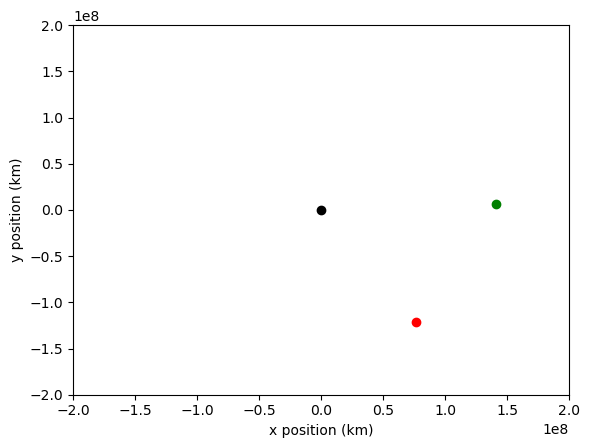

In [114]:
fig = plt.figure()
ax = fig.subplots()
plt.axis( [-2e8, 2e8, -2e8, 2e8] )
plt.plot(0,0, 'ko', lw=2)
ax.set_xlabel('x position (km)')
ax.set_ylabel('y position (km)') 

line1, = ax.plot([],[], 'go', lw=2)
line2, = ax.plot([],[], 'ro', lw=2)

def init():
    line1.set_data([],[])
    line2.set_data([],[])
    return (line1,line2)

def animate(i):
    xp1 = sol.y[0][i * Nskip] / 1e3
    yp1 = sol.y[1][i * Nskip] / 1e3
    xp2 = sol.y[2][i*Nskip]/1000
    yp2 = sol.y[3][i*Nskip]/1000
    line1.set_data([xp1], [yp1])
    line2.set_data([xp2],[yp2])
    return (line1,line2)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=Nframes, 
                               interval=100, blit=True)

f = "planetanimation.gif"
writergif = animation.PillowWriter(fps=30)
anim.save(f, writer=writergif)